## Exploratory data analysis



In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Path
PATH_FEATURE_STORE = '../data/feature_store'
PATH_PREPROCESSED_INPUT = '../data/experiment'

# Files
FILE_LOG = os.path.join(PATH_FEATURE_STORE ,'df_log_with_upid_acc.parquet.gzip')
FILE_USER_PROCESSED = os.path.join(PATH_PREPROCESSED_INPUT ,'Processed_Info_UserData_train.parquet.gzip')
FILE_CONTENT_PROCESSED = os.path.join(PATH_PREPROCESSED_INPUT ,'Processed_Info_Content_train.parquet.gzip')

In [ ]:
# Load data
df_user = pd.read_parquet(FILE_USER_PROCESSED)
df_content = pd.read_parquet(FILE_CONTENT_PROCESSED)
df_log = pd.read_parquet(FILE_LOG)

In [ ]:
# Join tables based on uuid and ucid
df1 = pd.merge(df_log, df_user, how='inner', left_on=['uuid', 'user_grade'], right_on=['uuid', 'user_grade']) # NOTE: user_grade is duplicated in both tables
df2 = pd.merge(df1, df_content, on='ucid')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323938 entries, 0 to 4323937
Data columns (total 35 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   timestamp_TW                     object  
 1   uuid                             category
 2   ucid                             object  
 3   upid                             category
 4   problem_number                   int16   
 5   exercise_problem_repeat_session  int16   
 6   is_correct                       boolean 
 7   total_attempt_cnt                int16   
 8   used_hint_cnt                    int16   
 9   level                            int8    
 10  user_grade                       int8    
 11  female                           bool    
 12  male                             bool    
 13  unspecified                      bool    
 14  v_upid_acc                       float64 
 15  v_uuid_upid_acc                  float64 
 16  gender                           cat

In [32]:
# Select only required columns 
required_columns = ['is_correct', 'total_attempt_cnt', 'user_grade',
                    'used_hint_cnt', 'level', 'difficulty', 'learning_stage', 
                    'gender',  'has_teacher_cnt', 'is_self_coach', 
                    'has_student_cnt', 'belongs_to_class_cnt', 'has_class_cnt']
                    # ['total_sec_taken', 'is_hint_used'] not in index
df = df2[required_columns]
df.head(5)

,is_correct,total_attempt_cnt,user_grade,used_hint_cnt,level,difficulty,learning_stage,gender,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,True,1,8,0,0,easy,elementary,female,0,False,0,0,0
1,True,1,8,0,0,easy,elementary,female,0,False,0,0,0
2,True,1,8,0,0,easy,elementary,female,0,False,0,0,0
3,True,1,8,0,0,easy,elementary,female,0,False,0,0,0
4,True,1,8,0,0,easy,elementary,female,0,False,0,0,0


In [33]:
# To include gender, difficulty, learning_stage in correlation matrix, change them to numeric values so that we can use them for training.
print('Unique Gender values = ', df.gender.unique())
print('Unique Difficulty values = ', df.difficulty.unique())
print('Unique Learning Stage values = ', df.learning_stage.unique())

Unique Gender values =  ['female', NaN, 'male', 'unspecified']
Categories (3, object): ['female', 'male', 'unspecified']
Unique Difficulty values =  ['easy', 'hard', 'normal', 'unset']
Categories (4, object): ['easy', 'hard', 'normal', 'unset']
Unique Learning Stage values =  ['elementary', 'junior', 'senior']
Categories (3, object): ['elementary', 'junior', 'senior']


In [35]:
# Assign category labels to Gender, Difficulty and Learning Columns.
df.loc[: 'gender'] = df.loc[: 'gender'].replace({'unspecified': 0, 'male': 1, 'female': 2})
df.loc[: 'difficulty'] = df.loc[: 'difficulty'].replace({'unset': 0, 'easy': 1, 'normal': 2, 'hard': 3})
df.loc[: 'learning_stage'] = df.loc[: 'learning_stage'].replace({'elementary': 0, 'junior': 1, 'senior': 2})
print('Unique Gender values = ', df.gender.unique())
print('Unique Difficulty values = ', df.difficulty.unique())
print('Unique Learning Stage values = ', df.learning_stage.unique())

Unique Gender values =  [2, NaN, 1, 0]
Categories (3, int64): [2, 1, 0]
Unique Difficulty values =  [1, 3, 2, 0]
Categories (4, int64): [1, 3, 2, 0]
Unique Learning Stage values =  [0, 1, 2]
Categories (3, int64): [0, 1, 2]


In [36]:
df = df.dropna()

In [37]:
# Plot correlation matrix after updating gender, difficulty and learning stage with numerical values.
corr = df.corr()
# Print correlation matrix
corr

,is_correct,total_attempt_cnt,user_grade,used_hint_cnt,level,difficulty,learning_stage,gender,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
is_correct,1.000000,-0.401654,-0.082937,-0.746126,0.137689,-0.082779,-0.090917,0.009599,0.007241,0.017411,-0.002363,0.012756,0.008670
total_attempt_cnt,-0.401654,1.000000,-0.003458,0.427611,-0.053947,0.060616,-0.008631,-0.015466,0.010527,-0.003739,0.002853,0.009491,0.005586
user_grade,-0.082937,-0.003458,1.000000,0.008526,-0.114338,-0.051089,0.676009,0.036639,-0.081048,-0.032380,-0.043968,-0.095596,-0.053395
used_hint_cnt,-0.746126,0.427611,0.008526,1.000000,-0.115261,0.124795,-0.033030,-0.005608,-0.001251,-0.008902,0.001253,-0.008167,0.000457
level,0.137689,-0.053947,-0.114338,-0.115261,1.000000,-0.039764,-0.090623,0.003489,0.032349,0.031269,0.001744,0.037466,0.038684
difficulty,-0.082779,0.060616,-0.051089,0.124795,-0.039764,1.000000,-0.071551,0.008080,0.012112,-0.003472,-0.003036,0.007570,0.005046
learning_stage,-0.090917,-0.008631,0.676009,-0.033030,-0.090623,-0.071551,1.000000,0.014456,-0.031873,-0.022533,-0.006210,-0.034626,-0.039516
gender,0.009599,-0.015466,0.036639,-0.005608,0.003489,0.008080,0.014456,1.000000,0.013044,0.001842,-0.021265,0.016416,0.019079
has_teacher_cnt,0.007241,0.010527,-0.081048,-0.001251,0.032349,0.012112,-0.031873,0.013044,1.000000,0.303263,0.225695,0.946151,0.454555
is_self_coach,0.017411,-0.003739,-0.032380,-0.008902,0.031269,-0.003472,-0.022533,0.001842,0.303263,1.000000,0.142263,0.326912,0.514661


<Axes: >

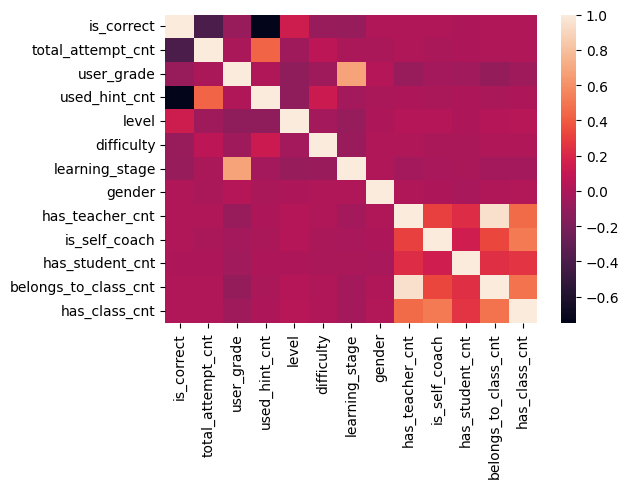

In [45]:
plt.figure(figsize = (6, 4))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)